In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('events.csv',low_memory=False)

In [3]:
df.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['time'] = pd.to_datetime(df['timestamp'])

In [5]:
def analizar (x):
    return pd.Series([x['event'].count(),\
               x['time'].max()-x['time'].min(),\
                ])
analisis = df.groupby('person').apply(analizar)

In [6]:
analisis.head()

,0,1
person,,
0004b0a2,4,0 days 00:00:35
0006a21a,4,0 days 00:00:10
000a54b2,37,44 days 15:22:01
00184bf9,51,40 days 23:33:10
0019c395,8,0 days 00:02:30


In [7]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27624 entries, 0004b0a2 to ffffac8a
Data columns (total 2 columns):
0    27624 non-null int64
1    27624 non-null timedelta64[ns]
dtypes: int64(1), timedelta64[ns](1)
memory usage: 647.4+ KB


In [8]:
analisis.describe()

,0,1
count,27624.000000,27624
mean,36.609036,11 days 19:44:08.239755
std,80.595628,27 days 17:07:37.657341
min,1.000000,0 days 00:00:00
25%,6.000000,0 days 00:01:45
50%,14.000000,0 days 00:11:33
75%,35.000000,5 days 08:00:16
max,2771.000000,164 days 07:37:19


In [57]:
def eventos (x):
    return ', '.join(sorted(list(x['event'].head(4))))
    
primeros_eventos = df.groupby('person').apply(eventos)

In [58]:
g = primeros_eventos.value_counts().head(5).to_frame()
g

,0
"ad campaign hit, generic listing, search engine hit, visited site",5313
"ad campaign hit, search engine hit, viewed product, visited site",3613
"ad campaign hit, checkout, viewed product, visited site",3022
"generic listing, search engine hit, viewed product, visited site",1808
"ad campaign hit, viewed product, viewed product, visited site",1708


Text(0.5,0,'Cantidad de personas')

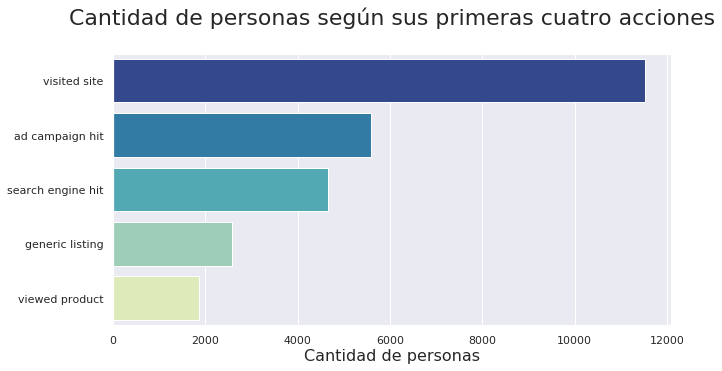

In [71]:
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=g,y=g.index,x=g[0],palette='YlGnBu_r',ax=ax)
plt.title('Cantidad de personas según sus primeras cuatro acciones\n',size=22)
plt.xlabel('Cantidad de personas',size=16)

In [65]:
def eventos (x):
    return list(x['event'])[0]
    
primeros_eventos = df.groupby('person').apply(eventos)

In [66]:
g = primeros_eventos.value_counts().head(5).to_frame()
g

,0
visited site,11519
ad campaign hit,5598
search engine hit,4648
generic listing,2575
viewed product,1866


Text(0.5,0,'Cantidad de personas')

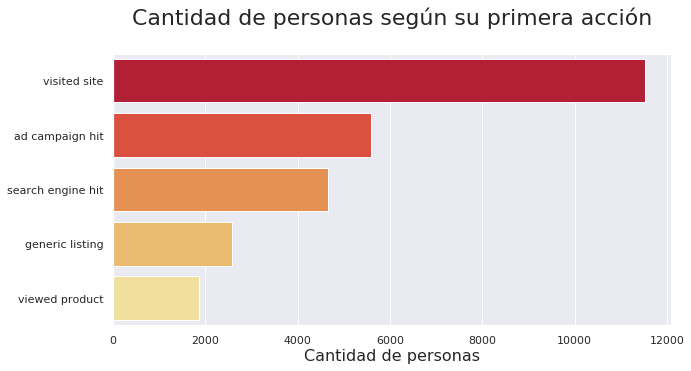

In [70]:
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=g,y=g.index,x=g[0],palette='YlOrRd_r',ax=ax)
plt.title('Cantidad de personas según su primera acción\n',size=22)
plt.xlabel('Cantidad de personas',size=16)